**My 3rd Guvi project on
sentiment analysis on IMDB movie reviews..**

## Problem Definition
We aim to perform sentiment analysis on IMDB movie reviews...


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_csv("IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df.shape

(50000, 2)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [8]:
df.replace({"sentiment":{"positive": 1, "negative":0}}, inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [10]:
df["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [12]:
train_df, test_df = train_test_split(df,test_size = 0.2, random_state = 42)


In [13]:
train_df.shape

(40000, 2)

In [14]:
test_df.shape

(10000, 2)

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df["review"])

In [16]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df["review"]), maxlen=200)

In [17]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [18]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]], dtype=int32)

In [19]:
Y_train = train_df["sentiment"]
Y_test = test_df["sentiment"]

In [20]:
Y_train

,sentiment
39087,0
30893,0
45278,1
16398,0
13653,0
...,...
11284,1
44732,1
38158,0
860,1


#LSTM model

In [21]:
model = Sequential()
model.add(Embedding(5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["accuracy"])


In [24]:
model.fit(X_train,Y_train,epochs=5, batch_size=64,validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 314s 622ms/step - accuracy: 0.7270 - loss: 0.5273 - val_accuracy: 0.6697 - val_loss: 0.6129
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 315s 608ms/step - accuracy: 0.7621 - loss: 0.4930 - val_accuracy: 0.8594 - val_loss: 0.3432
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 309s 618ms/step - accuracy: 0.8736 - loss: 0.3172 - val_accuracy: 0.8670 - val_loss: 0.3218
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 307s 614ms/step - accuracy: 0.8934 - loss: 0.2721 - val_accuracy: 0.8690 - val_loss: 0.3059
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 308s 617ms/step - accuracy: 0.9050 - loss: 0.2444 - val_accuracy: 0.8767 - val_loss: 0.2992


In [27]:
model.save("model.h5")

In [28]:
import joblib
joblib.dump(tokenizer,"tokenizer.pkl")

['tokenizer.pkl']

In [29]:
loss,accuracy = model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.8746 - loss: 0.2883


In [30]:
print(loss)

0.28548890352249146


In [31]:
print(accuracy)

0.8794000148773193


# Building a predictive system

In [32]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequences = pad_sequences(sequences,maxlen=200)
  prediction = model.predict(padded_sequences)
  sentiment = "positive"if prediction[0][0]>0.5 else "negative"
  return sentiment


In [33]:
predictive_system("This movie was fantastic ans amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


'positive'

In [34]:
predictive_system("This movie was not so good organized")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'negative'

In [35]:
predictive_system("A thrilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'positive'

In [36]:
predictive_system("A visual masterpeace")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


'positive'

In [37]:
predictive_system("overall wrong and slow movie")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


'negative'

# Data cleaning and preprocessing

In [49]:
# Section 3: Data Cleaning & Preparation
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
df = pd.read_csv("/content/IMDB Dataset.csv")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function for cleaning reviews
def clean_review(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Lowercase
    text = text.lower()

    # Remove punctuation, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    words = text.split()

    # Remove stopwords
    words = [w for w in words if w not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(w) for w in words]

    return " ".join(words)

# Apply cleaning
df["cleaned_review"] = df["review"].apply(clean_review)

# Create new column: review length (word count)
df["review_length"] = df["cleaned_review"].apply(lambda x: len(x.split()))

# Preview
print(df.head())




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  review_length  
0  one reviewer mentioned watching oz episode you...            167  
1  wonderful little production filming technique ...             84  
2  thought wonderful way spend time hot summer we...             85  
3  basically there family little boy jake think t...             66  
4  petter matteis love time money visually stunni...            125  


#Data exploration and Summarization

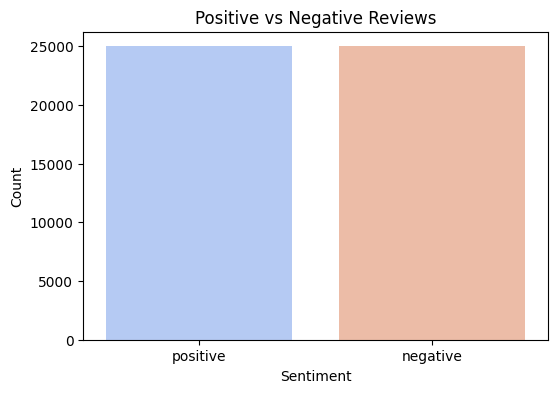

📊 Average Review Length (words):
 sentiment
negative    117.25608
positive    119.94956
Name: review_length, dtype: float64 

📌 Sample Reviews Before & After Cleaning:

Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

Cleaned : one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pu...

--------------------------------------------------------------------------------
Original: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...

Cleaned : wonderful little production filming technique unassuming oldtimebbc fashion give comforting som

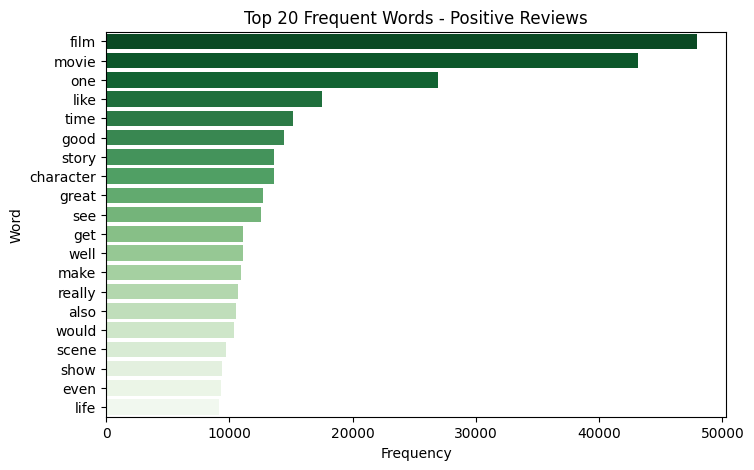

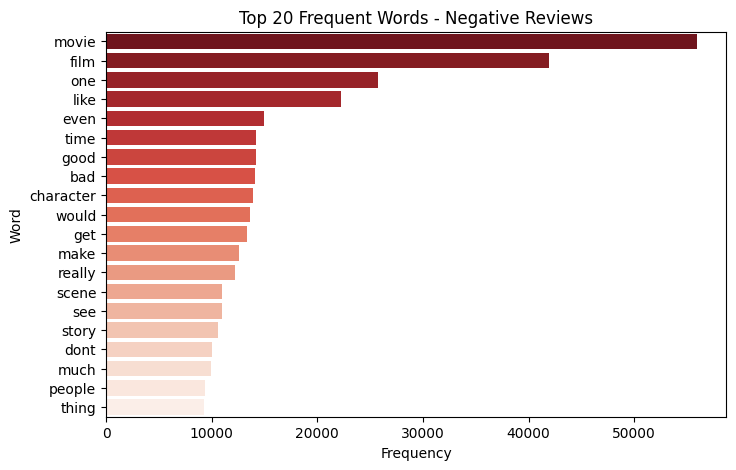

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Assuming df is already cleaned from Slide 4
# df contains: ["review", "cleaned_review", "review_length", "sentiment"]

# 1. Positive vs Negative review count
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Positive vs Negative Reviews")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()

# 2. Average review length
avg_length = df.groupby("sentiment")["review_length"].mean()
print("Average Review Length (words):\n", avg_length, "\n")

# 3. Few sample reviews before & after cleaning
print(" Sample Reviews Before & After Cleaning:\n")
for i in range(3):
    print(f"Original: {df['review'].iloc[i][:200]}...\n")  # first 200 chars
    print(f"Cleaned : {df['cleaned_review'].iloc[i][:200]}...\n")
    print("-"*80)

# 4. Word Frequency Function
def get_top_words(reviews, n=20):
    all_words = " ".join(reviews).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

# Top 20 words in positive reviews
pos_reviews = df[df["sentiment"]=="positive"]["cleaned_review"]
neg_reviews = df[df["sentiment"]=="negative"]["cleaned_review"]

top_pos = get_top_words(pos_reviews, 20)
top_neg = get_top_words(neg_reviews, 20)

# Convert to DataFrame for plotting
pos_df = pd.DataFrame(top_pos, columns=["Word", "Frequency"])
neg_df = pd.DataFrame(top_neg, columns=["Word", "Frequency"])

# Plot Positive words
plt.figure(figsize=(8,5))
sns.barplot(x="Frequency", y="Word", data=pos_df, palette="Greens_r")
plt.title("Top 20 Frequent Words - Positive Reviews")
plt.show()

# Plot Negative words
plt.figure(figsize=(8,5))
sns.barplot(x="Frequency", y="Word", data=neg_df, palette="Reds_r")
plt.title("Top 20 Frequent Words - Negative Reviews")
plt.show()



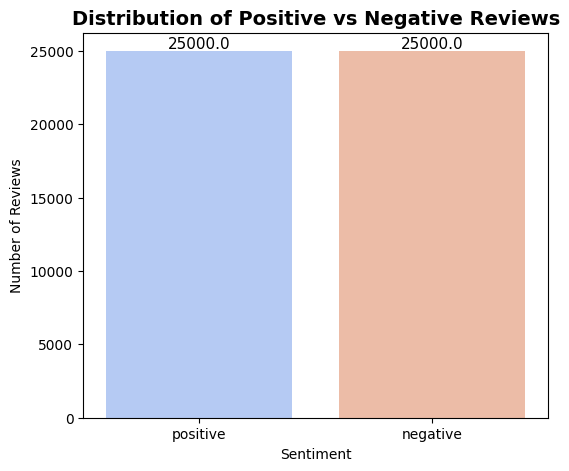

 Average Review Length (words): 118.60


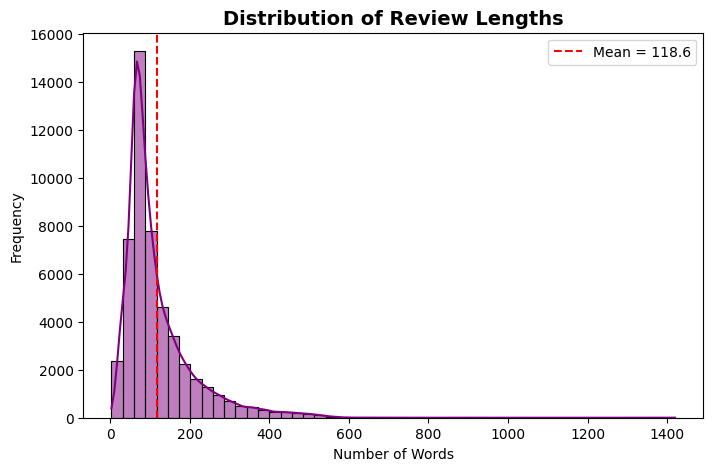


📖 Sample Positive Review:
 "The Cell" is an exotic masterpiece, a dizzying trip into not only the vast mind of a serial killer, but also into one of a very talented director. This is conclusive evidence of what can be achieved if human beings unleash their uninhibited imaginations. This is boldness at work, pushing aside thoughts to fall into formulas and cliches and creating something truly magnificent. This is the best movie of the year to date.<br /><br />I've read numerous complaints about this film, anywhere from all style and no substance to poorly cast characters and bad acting. To negatively criticize this film is to miss the point. This movie may be a landmark, a tradition where future movies will hopefully follow. "The Cell" has just opened the door to another world of imagination. So can we slam the door in its face and tell it and its director Tarsem Singh that we don't want any more? Personally, I would more than welcome another movie by Tarsem, and would love to see some

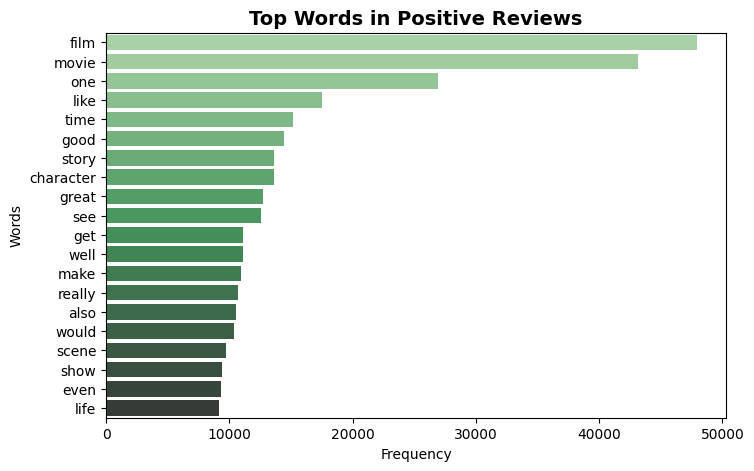

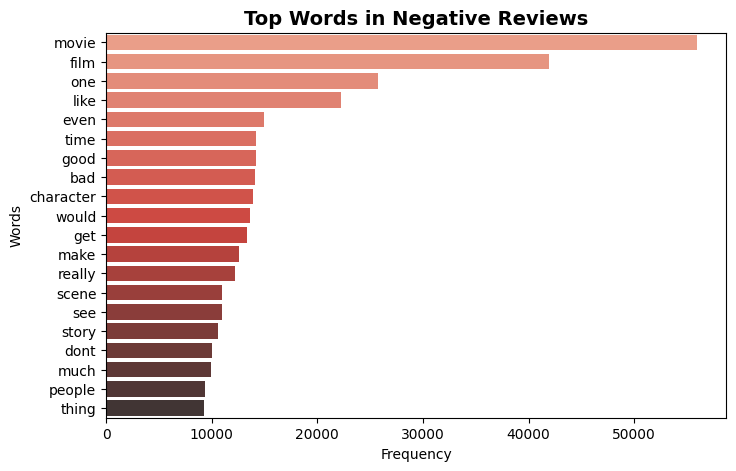

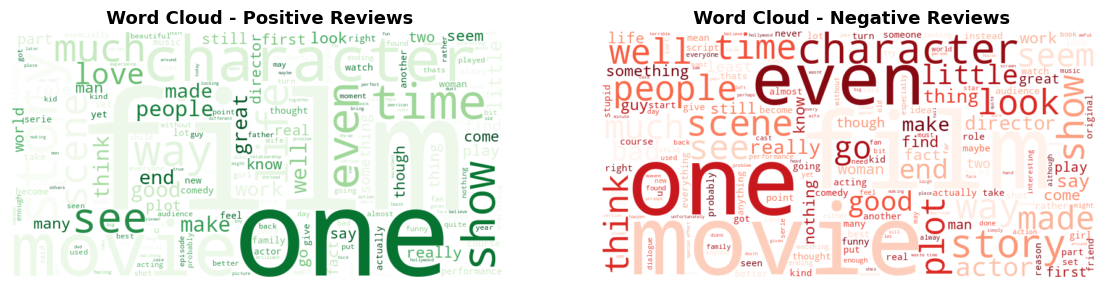

In [53]:
# Data Exploration & Summarization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import random

# 1. Sentiment Distribution
plt.figure(figsize=(6,5))
ax = sns.countplot(x='sentiment', data=df, palette="coolwarm")
plt.title("Distribution of Positive vs Negative Reviews", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0,5),
                textcoords='offset points')
plt.show()


# 2. Review Length Analysis
df["review_length"] = df["cleaned_review"].apply(lambda x: len(x.split()))
avg_len = df["review_length"].mean()
print(f" Average Review Length (words): {avg_len:.2f}")

plt.figure(figsize=(8,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="purple")
plt.axvline(avg_len, color="red", linestyle="--", label=f"Mean = {avg_len:.1f}")
plt.title("Distribution of Review Lengths", fontsize=14, fontweight="bold")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 3. Sample Reviews
print("\n📖 Sample Positive Review:\n",
      random.choice(df[df["sentiment"]=="positive"]["review"].values[:20]))
print("\n📖 Sample Negative Review:\n",
      random.choice(df[df["sentiment"]=="negative"]["review"].values[:20]))


# 4. Word Frequency Analysis
def get_word_frequencies(texts, n=20):
    """Return top n most common words from list of texts"""
    words = " ".join(texts).split()
    counter = Counter(words)
    return counter.most_common(n)

pos_common = get_word_frequencies(df[df['sentiment']=="positive"]["cleaned_review"], 20)
neg_common = get_word_frequencies(df[df['sentiment']=="negative"]["cleaned_review"], 20)

print("\n Top 20 Words in Positive Reviews:\n", pos_common)
print("\n Top 20 Words in Negative Reviews:\n", neg_common)

# Plot word frequency comparison
def plot_word_freq(common_words, title, color):
    words, counts = zip(*common_words)
    plt.figure(figsize=(8,5))
    sns.barplot(x=list(counts), y=list(words), palette=color)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_word_freq(pos_common, "Top Words in Positive Reviews", "Greens_d")
plot_word_freq(neg_common, "Top Words in Negative Reviews", "Reds_d")


# 5. Word Clouds
pos_text = " ".join(df[df['sentiment']=="positive"]["cleaned_review"])
neg_text = " ".join(df[df['sentiment']=="negative"]["cleaned_review"])

wordcloud_pos = WordCloud(width=800, height=400, background_color="white",
                          colormap="Greens", max_words=200).generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white",
                          colormap="Reds", max_words=200).generate(neg_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title(" Word Cloud - Positive Reviews", fontsize=13, fontweight="bold")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title(" Word Cloud - Negative Reviews", fontsize=13, fontweight="bold")
plt.show()


#TF-IDF

In [ ]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF with top 5000 words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit on training data and transform both train & test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Shapes of the transformed data
print("TF-IDF Shape (Train):", X_train_tfidf.shape)
print("TF-IDF Shape (Test):", X_test_tfidf.shape)



TF-IDF Shape (Train): (40000, 5000)
TF-IDF Shape (Test): (10000, 5000)


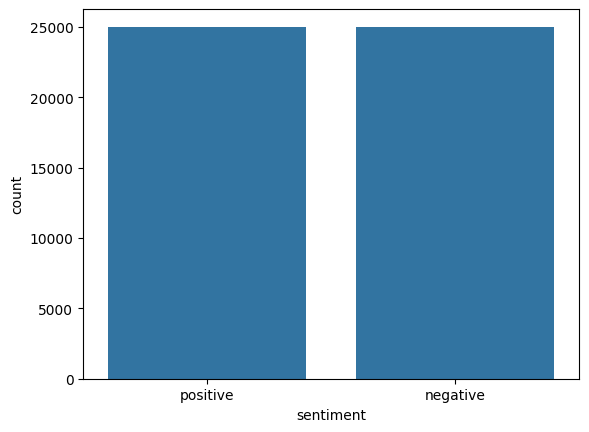

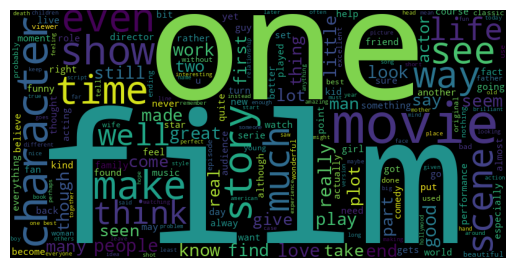

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.countplot(x='sentiment', data=df)
plt.show()

positive_text = " ".join(df[df['sentiment']=='positive']['cleaned'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['sentiment'].map({'positive':1, 'negative':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8556
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Accuracy: 0.8556

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



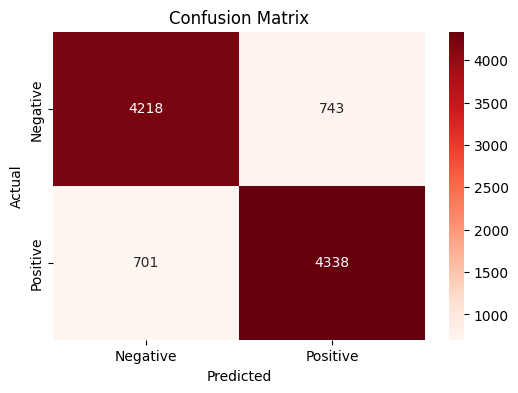

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose y_test are true labels and y_pred are model predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [58]:
import re

# Assume df['review'] contains IMDB text reviews
def preprocess(text):
    text = text.lower()                           # lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)       # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()      # remove extra spaces
    return text

df['cleaned'] = df['review'].apply(preprocess)


In [59]:
X = df['cleaned']
y = df['sentiment']   # make sure this is 0/1 or "positive"/"negative"


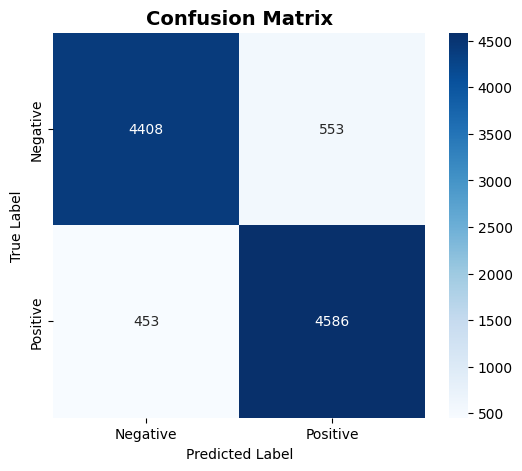


Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



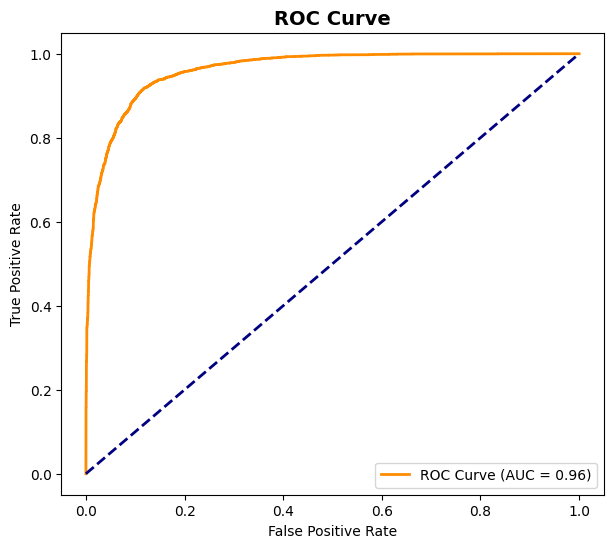

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Features (cleaned reviews) and Labels (sentiment: positive/negative or 1/0)
X = df['cleaned']
y = df['sentiment']   # make sure sentiment is 0/1 or "positive"/"negative"

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_vect = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve & AUC
y_test_binary = y_test.map({"negative":0, "positive":1}) if y_test.dtype == "object" else y_test
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Sentiment distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Cleaning text (this may take ~1-2 minutes)...


,review,cleaned,sentiment,review_len
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...,positive,162
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive,86
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive,84
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative,64
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...,positive,125


Class counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


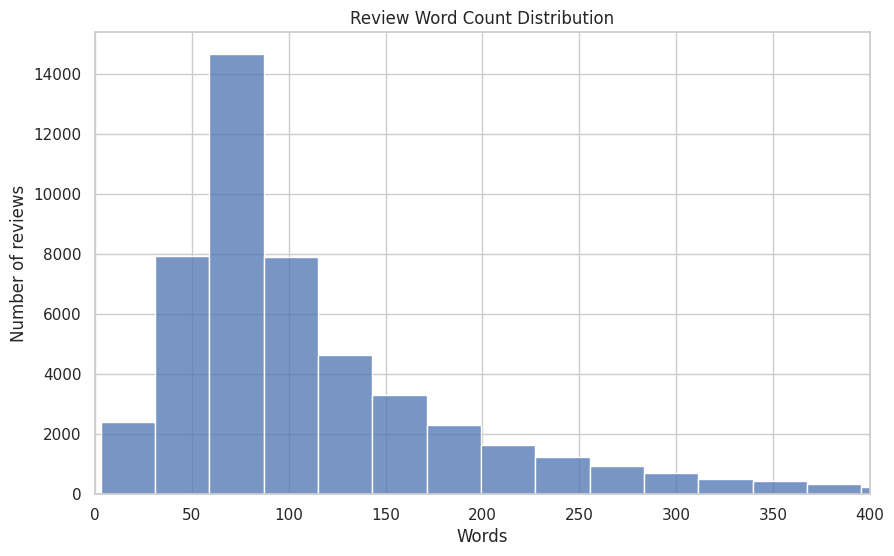

Avg review length by sentiment:
sentiment
negative    116.0002
positive    119.6152
Name: review_len, dtype: float64
Top words (overall): [('movie', np.int64(103280)), ('film', np.int64(93458)), ('like', np.int64(41132)), ('time', np.int64(31470)), ('good', np.int64(29868)), ('character', np.int64(28361)), ('story', np.int64(25276)), ('make', np.int64(24210)), ('really', np.int64(23095)), ('scene', np.int64(21450)), ('bad', np.int64(18474)), ('people', np.int64(18367)), ('great', np.int64(18226)), ('way', np.int64(17231)), ('thing', np.int64(16512))]


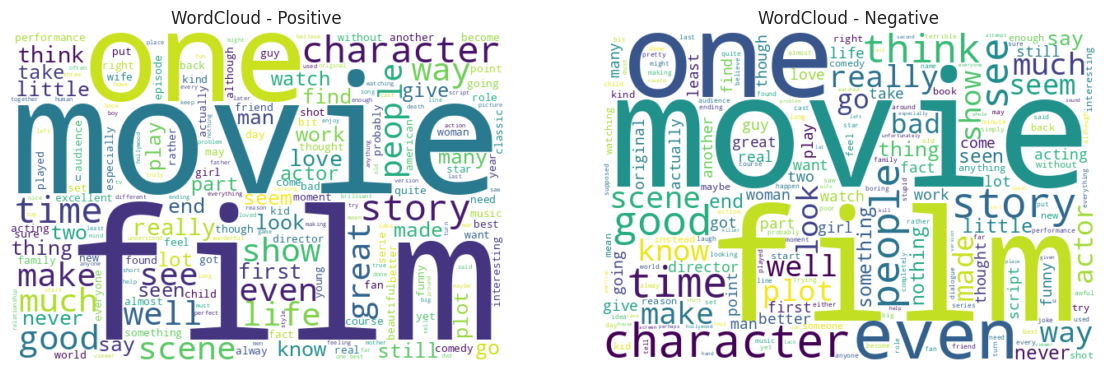

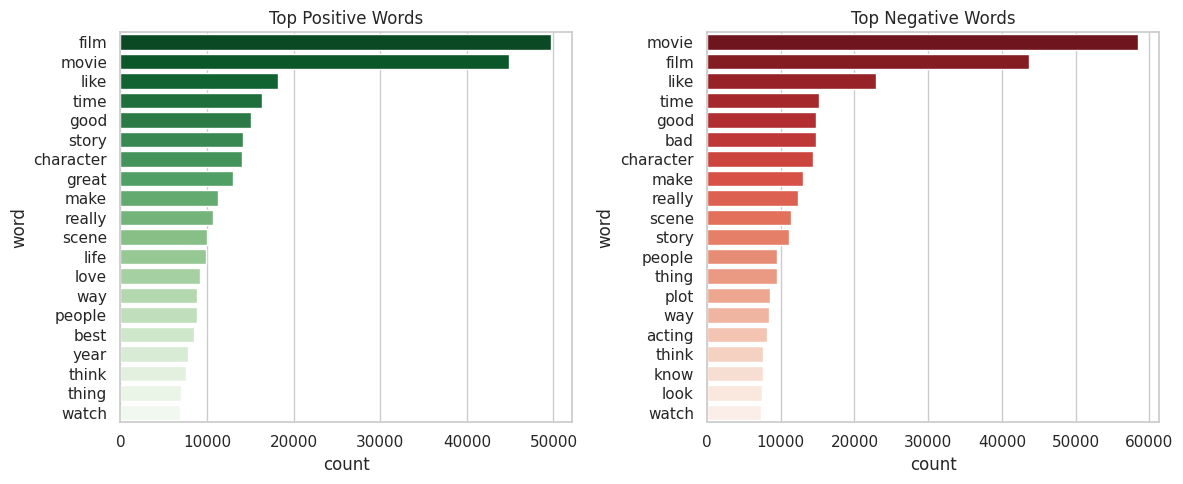

Train shape: (40000, 20000) Test shape: (10000, 20000)

=== NaiveBayes ===
{'accuracy': 0.8768, 'precision': 0.8641283339775802, 'recall': 0.8942, 'f1': 0.878907017888736, 'roc_auc': np.float64(0.9448245600000003)}

=== LogisticRegression ===
{'accuracy': 0.8986, 'precision': 0.8892578125, 'recall': 0.9106, 'f1': 0.899802371541502, 'roc_auc': np.float64(0.96381744)}

Classification report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



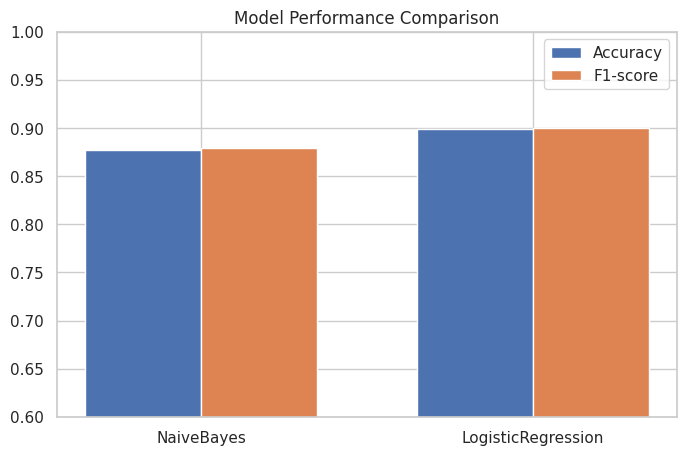

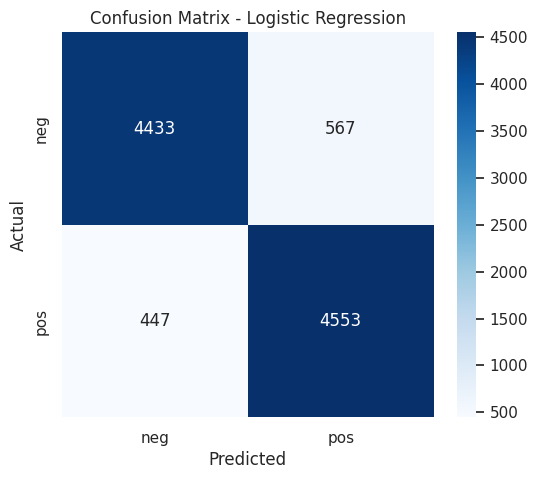

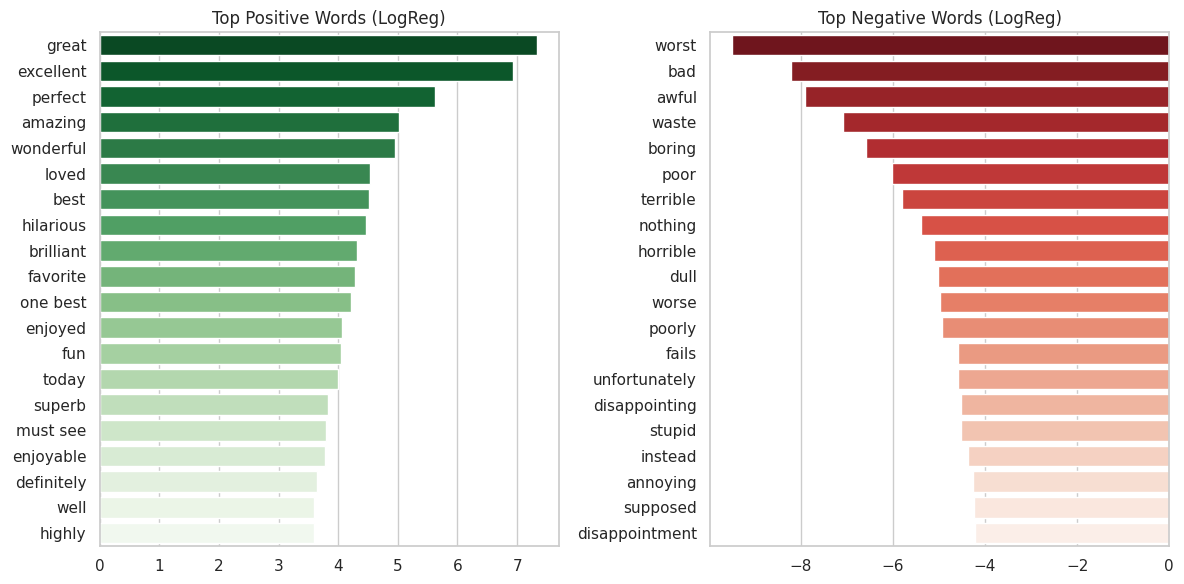

Top Positive words: ['great', 'excellent', 'perfect', 'amazing', 'wonderful', 'loved', 'best', 'hilarious', 'brilliant', 'favorite']
Top Negative words: ['worst', 'bad', 'awful', 'waste', 'boring', 'poor', 'terrible', 'nothing', 'horrible', 'dull']
Saved predictions to: outputs/predictions_for_report.csv

--- Quick Insights for Report ---
Best model chosen: LogisticRegression
Metrics (accuracy / precision / recall / f1 / roc_auc):
{'accuracy': 0.8986, 'precision': 0.8892578125, 'recall': 0.9106, 'f1': 0.899802371541502, 'roc_auc': np.float64(0.96381744)}

False Negatives (examples):


,review,cleaned,predicted_label,prob_pos
53,Tenshu is imprisoned and sentenced to death. W...,tenshu imprisoned sentenced death survives ele...,negative,0.485617
60,I just can't believe some of the comments on t...,believe comment show show genius sure follow t...,negative,0.224326
63,1. I've seen Branaghs Hamlet: Branagh is too o...,seen branaghs hamlet branagh old speaks freque...,negative,0.329781



False Positives (examples):


,review,cleaned,predicted_label,prob_pos
0,"Yes, MTV there really is a way to market Daria...",yes mtv really way market daria started clever...,positive,0.515348
14,Little Quentin seems to have mastered the art ...,little quentin seems mastered art cake eating ...,positive,0.894104
18,The film listed here as having been made in 19...,film listed made film available something weir...,positive,0.581890



All done. Use the outputs in the 'outputs/' folder for your report and PPT.


In [61]:

#  Imports library its important
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# --------- 2. NLTK downloads (run once) ----------
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# --------- 3. Load Data ----------
# Put your CSV in working dir or in Colab upload. Default expected filename:
DATA_PATH = "IMDB Dataset.csv"  # change path if different

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Place IMDB dataset as '{DATA_PATH}' in the working directory.")

df = pd.read_csv(DATA_PATH)  # expected columns: review, sentiment
print("Dataset shape:", df.shape)
display(df.head())

# Quick sanity
print("Sentiment distribution:\n", df['sentiment'].value_counts())

# --------- 4. Data Cleaning & Preparation ----------
# Pre-compile regex
TAG_RE = re.compile(r'<.*?>')
URL_RE = re.compile(r'http\S+')
NON_ALPHA_RE = re.compile(r'[^a-zA-Z\s]')

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = TAG_RE.sub(' ', text)               # remove HTML tags
    text = URL_RE.sub(' ', text)               # remove URLs
    text = NON_ALPHA_RE.sub(' ', text)         # remove non-letters
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS and len(t) > 1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

# Apply cleaning (fast enough; use .progress_apply if tqdm installed)
print("Cleaning text (this may take ~1-2 minutes)...")
df['cleaned'] = df['review'].astype(str).apply(clean_text)

# Add review length features
df['review_len'] = df['cleaned'].apply(lambda x: len(x.split()))
df['char_len'] = df['cleaned'].apply(lambda x: len(x))

display(df[['review', 'cleaned', 'sentiment', 'review_len']].head())

# Convert labels to binary
df['label'] = df['sentiment'].map({'negative':0, 'positive':1})

# --------- 5. EDA & Summarization ----------
# Class balance
print("Class counts:\n", df['sentiment'].value_counts())

# Review length distribution
plt.figure()
sns.histplot(df['review_len'], bins=50, kde=False)
plt.title("Review Word Count Distribution")
plt.xlabel("Words")
plt.ylabel("Number of reviews")
plt.xlim(0, 400)
plt.show()

# Average review length by sentiment
print("Avg review length by sentiment:")
print(df.groupby('sentiment')['review_len'].mean())

# Top words overall (using CountVectorizer)
cv = CountVectorizer(stop_words='english', max_features=5000)
cv_fit = cv.fit_transform(df['cleaned'])
word_counts = np.asarray(cv_fit.sum(axis=0)).ravel()
words = cv.get_feature_names_out()
top_idx = np.argsort(word_counts)[-30:][::-1]
top_words = [(words[i], word_counts[i]) for i in top_idx]
print("Top words (overall):", top_words[:15])

# WordClouds: Positive vs Negative
pos_text = " ".join(df[df['label']==1]['cleaned'].sample(5000, random_state=1))
neg_text = " ".join(df[df['label']==0]['cleaned'].sample(5000, random_state=1))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
wc = WordCloud(width=600, height=400, background_color='white').generate(pos_text)
plt.imshow(wc, interpolation='bilinear'); plt.axis('off'); plt.title("WordCloud - Positive")

plt.subplot(1,2,2)
wc = WordCloud(width=600, height=400, background_color='white').generate(neg_text)
plt.imshow(wc, interpolation='bilinear'); plt.axis('off'); plt.title("WordCloud - Negative")
plt.show()

# Show most common words in positive vs negative using CountVectorizer filtered by sentiment
def top_n_words_by_label(df, label, n=20):
    subset = df[df['label']==label]
    cv = CountVectorizer(stop_words='english', max_features=5000, min_df=5)
    mat = cv.fit_transform(subset['cleaned'])
    s = np.asarray(mat.sum(axis=0)).ravel()
    w = cv.get_feature_names_out()
    top = pd.DataFrame({'word': w, 'count': s}).sort_values('count', ascending=False).head(n)
    return top

top_pos = top_n_words_by_label(df, 1, 20)
top_neg = top_n_words_by_label(df, 0, 20)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='count', y='word', data=top_pos, palette='Greens_r').set_title("Top Positive Words")
plt.subplot(1,2,2)
sns.barplot(x='count', y='word', data=top_neg, palette='Reds_r').set_title("Top Negative Words")
plt.tight_layout()
plt.show()

# --------- 6. Modeling (TF-IDF + ML Models) ----------
# Prepare TF-IDF features
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), min_df=3)
X = tfidf.fit_transform(df['cleaned'])
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.20, stratify=y, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Train models: MultinomialNB and LogisticRegression
models = {}
results = {}

# 1) Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:,1]
models['NaiveBayes'] = nb

# 2) Logistic Regression
lr = LogisticRegression(max_iter=1000, C=1.0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]
models['LogisticRegression'] = lr

# Collect metrics
def get_metrics(y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob) if y_prob is not None else np.nan
    return {'accuracy':acc, 'precision':prec, 'recall':rec, 'f1':f1, 'roc_auc':roc}

results['NaiveBayes'] = get_metrics(y_test, y_pred_nb, y_prob_nb)
results['LogisticRegression'] = get_metrics(y_test, y_pred_lr, y_prob_lr)

# Print reports
for name, res in results.items():
    print(f"\n=== {name} ===")
    print(res)
    if name=='LogisticRegression':
        print("\nClassification report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

# Model comparison bar plot (accuracy & f1)
model_names = list(results.keys())
accs = [results[m]['accuracy'] for m in model_names]
f1s = [results[m]['f1'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - width/2, accs, width, label='Accuracy')
plt.bar(x + width/2, f1s, width, label='F1-score')
plt.xticks(x, model_names)
plt.ylim(0.6,1.0)
plt.legend()
plt.title("Model Performance Comparison")
plt.show()

# Confusion matrix for best model (use Logistic Regression here)
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# --------- 7. Feature importance (most influential words) ----------
# For Logistic Regression, coefficients map to tfidf features
feature_names = np.array(tfidf.get_feature_names_out())
coeff = lr.coef_[0]
# Top positive words (largest positive coefficients)
n = 20
top_pos_idx = np.argsort(coeff)[-n:][::-1]
top_neg_idx = np.argsort(coeff)[:n]

top_pos_words = feature_names[top_pos_idx]
top_pos_vals = coeff[top_pos_idx]
top_neg_words = feature_names[top_neg_idx]
top_neg_vals = coeff[top_neg_idx]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=top_pos_vals, y=top_pos_words, palette='Greens_r').set_title("Top Positive Words (LogReg)")
plt.subplot(1,2,2)
sns.barplot(x=top_neg_vals, y=top_neg_words, palette='Reds_r').set_title("Top Negative Words (LogReg)")
plt.tight_layout()
plt.show()

print("Top Positive words:", list(top_pos_words[:10]))
print("Top Negative words:", list(top_neg_words[:10]))

# --------- 8. Save predictions & sample errors for report ----------
test_reviews = df.loc[idx_test, ['review', 'cleaned', 'sentiment']].copy()
test_reviews = test_reviews.reset_index(drop=True)
test_reviews['predicted'] = y_pred_lr
test_reviews['prob_pos'] = y_prob_lr

# Map numeric predicted back to label
test_reviews['predicted_label'] = test_reviews['predicted'].map({0:'negative',1:'positive'})

# Save CSV for report
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)
pred_csv = os.path.join(OUT_DIR, "predictions_for_report.csv")
test_reviews.to_csv(pred_csv, index=False)
print(f"Saved predictions to: {pred_csv}")

# Save top words CSVs
pd.DataFrame({'word': top_pos_words, 'coef': top_pos_vals}).to_csv(os.path.join(OUT_DIR,'top_positive_words.csv'), index=False)
pd.DataFrame({'word': top_neg_words, 'coef': top_neg_vals}).to_csv(os.path.join(OUT_DIR,'top_negative_words.csv'), index=False)

# --------- 9. Quick utility prints for Insights & Report ----------
print("\n--- Quick Insights for Report ---")
best = 'LogisticRegression'
print(f"Best model chosen: {best}")
print("Metrics (accuracy / precision / recall / f1 / roc_auc):")
print(results[best])

# Show sample predictions: correct, false negative, false positive
sample_df = test_reviews.copy()
sample_df['true_label'] = sample_df['sentiment']
# false negatives: true positive but predicted negative (1 -> 0)
fn = sample_df[(sample_df['predicted']==0) & (sample_df['true_label']=='positive')].head(3)
fp = sample_df[(sample_df['predicted']==1) & (sample_df['true_label']=='negative')].head(3)
print("\nFalse Negatives (examples):")
display(fn[['review','cleaned','predicted_label','prob_pos']])
print("\nFalse Positives (examples):")
display(fp[['review','cleaned','predicted_label','prob_pos']])

# --------- 10. Save the notebook outputs / figures if needed ----------
# You can save generated figures using plt.savefig(...) where necessary, e.g.:
# plt.savefig(os.path.join(OUT_DIR,"confusion_matrix.png"), dpi=200)

print("\nAll done. Use the outputs in the 'outputs/' folder for your report and PPT.")


#DATA VISUALIZATION

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
import numpy as np

Text(0, 0.5, 'Number of Reviews')

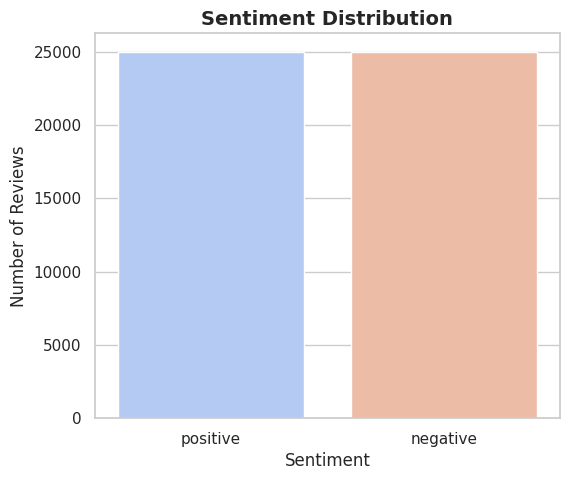

In [64]:
# 1. Sentiment Distribution
plt.figure(figsize=(6,5))
ax = sns.countplot(x='sentiment', data=df, palette="coolwarm")
plt.title("Sentiment Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")


In [65]:
# Annotate values
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()

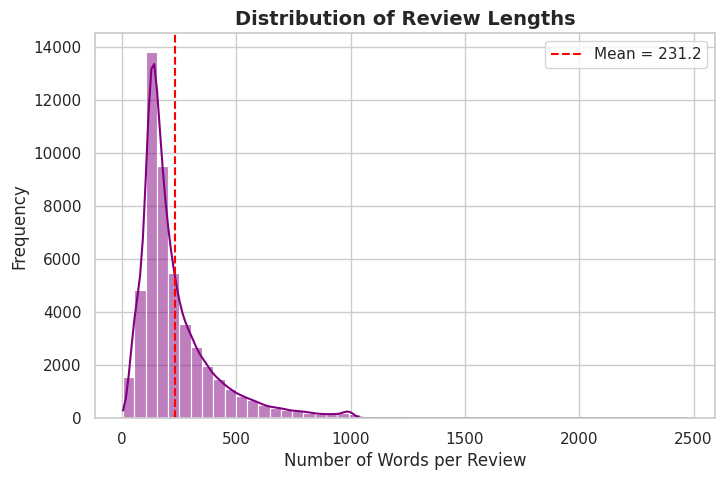

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Make sure you have a review column ---
# Adjust this depending on your dataset (common names: 'review', 'text', 'cleaned_review')
if "processed_review" in df.columns:
    review_col = "processed_review"
elif "cleaned_review" in df.columns:
    review_col = "cleaned_review"
elif "review" in df.columns:
    review_col = "review"
else:
    raise KeyError("No review column found! Expected 'processed_review', 'cleaned_review', or 'review'.")

# --- Step 2: Create review_length column ---
df["review_length"] = df[review_col].astype(str).apply(lambda x: len(x.split()))

# --- Step 3: Plot Histogram ---
plt.figure(figsize=(8,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="purple")

# Add mean line
mean_length = df["review_length"].mean()
plt.axvline(mean_length, color="red", linestyle="--", label=f"Mean = {mean_length:.1f}")

# Titles and labels
plt.title("Distribution of Review Lengths", fontsize=14, fontweight="bold")
plt.xlabel("Number of Words per Review")
plt.ylabel("Frequency")
plt.legend()
plt.show()



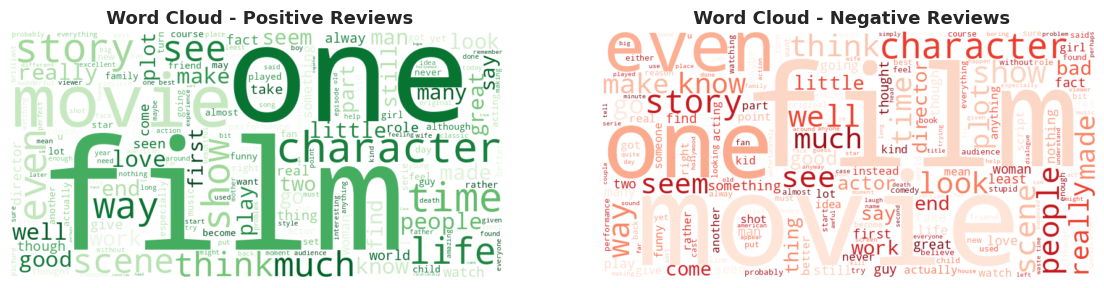

In [68]:
# 3. Word Clouds
# ------------------------------
pos_text = " ".join(df[df['sentiment']=="positive"]["cleaned"])
neg_text = " ".join(df[df['sentiment']=="negative"]["cleaned"])

wordcloud_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens", max_words=200).generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds", max_words=200).generate(neg_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title(" Word Cloud - Positive Reviews", fontsize=13, fontweight="bold")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title(" Word Cloud - Negative Reviews", fontsize=13, fontweight="bold")
plt.show()


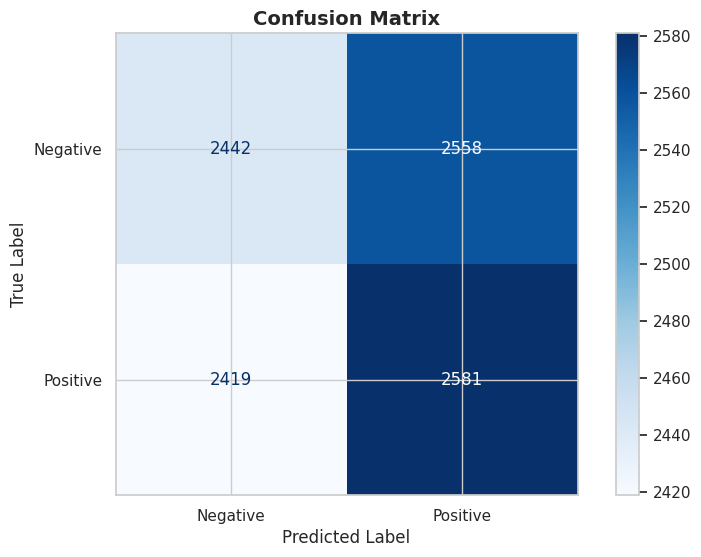

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert string predictions into numeric values
y_pred_mapped = [1 if label == "positive" else 0 for label in y_pred]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mapped)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()





#Top words charts(from model coefficient)

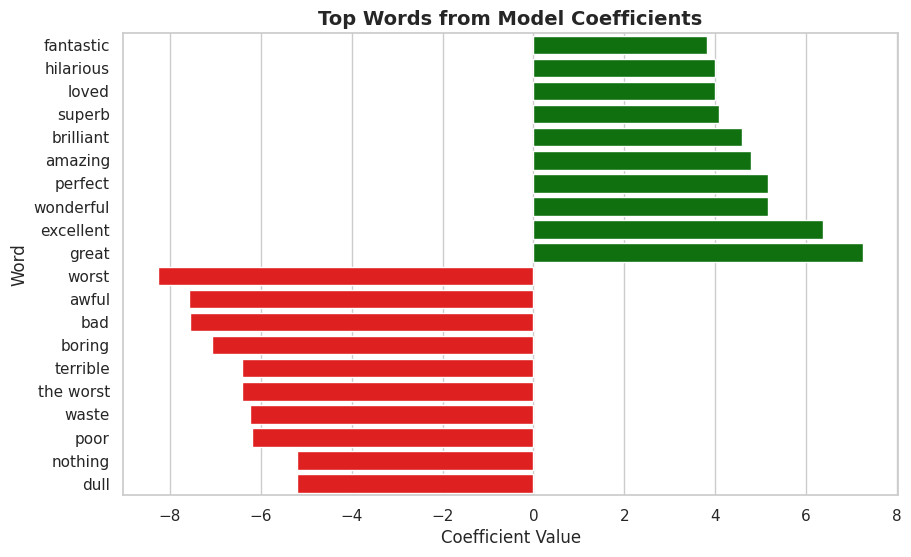

In [72]:
import numpy as np

# Example if model is Logistic Regression
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Get top positive & negative words
top_pos_indices = np.argsort(coefficients)[-10:]
top_neg_indices = np.argsort(coefficients)[:10]

top_pos_words = feature_names[top_pos_indices]
top_neg_words = feature_names[top_neg_indices]

top_pos_values = coefficients[top_pos_indices]
top_neg_values = coefficients[top_neg_indices]

# Combine for plotting
words = list(top_pos_words) + list(top_neg_words)
values = list(top_pos_values) + list(top_neg_values)
colors = ["green"]*10 + ["red"]*10

plt.figure(figsize=(10,6))
sns.barplot(x=values, y=words, palette=colors)
plt.title("Top Words from Model Coefficients", fontsize=14, fontweight="bold")
plt.xlabel("Coefficient Value")
plt.ylabel("Word")
plt.show()


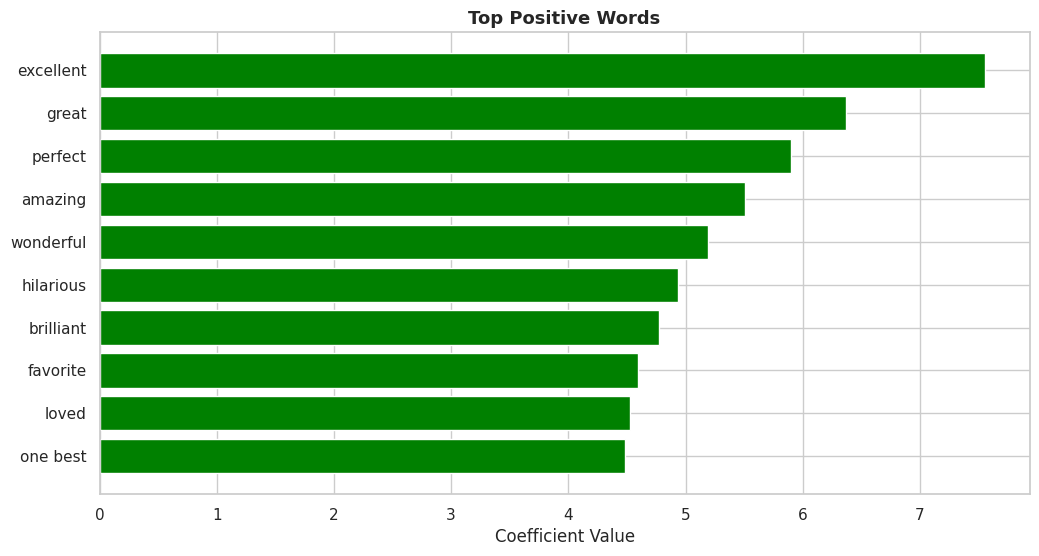

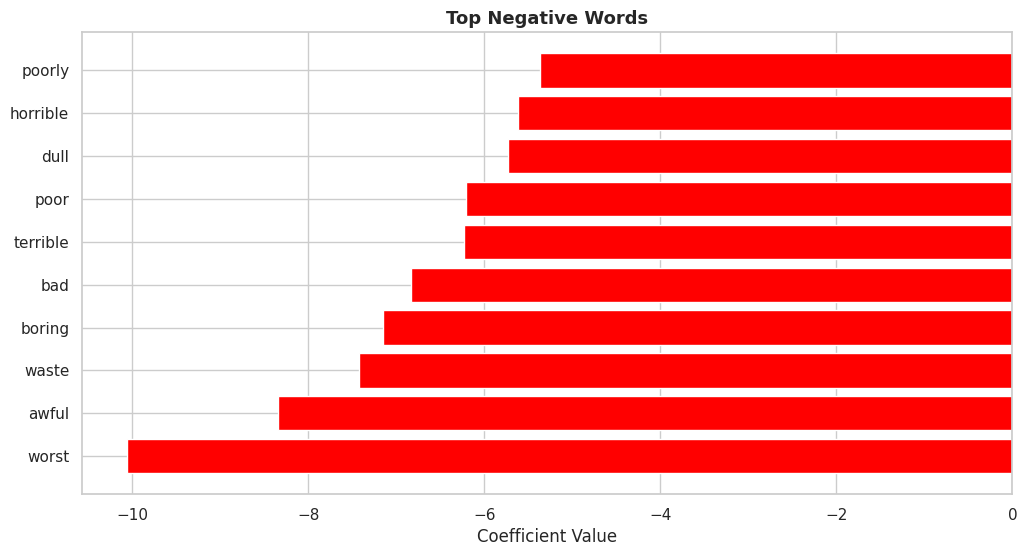

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Define TF-IDF vectorizer (if not already defined)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_vect = tfidf_vectorizer.fit_transform(df['cleaned'])
y = df['sentiment'].map({"positive":1, "negative":0})

# ✅ Train Logistic Regression model (since we need coefficients)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_vect, y)

# ✅ Get feature names & coefficients
feature_names = tfidf_vectorizer.get_feature_names_out()
coef = model.coef_[0]

# ✅ Sort coefficients
top_pos_idx = np.argsort(coef)[-10:]   # top 10 positive
top_neg_idx = np.argsort(coef)[:10]    # top 10 negative

# ✅ Plot Positive Words
plt.figure(figsize=(12,6))
plt.barh([feature_names[i] for i in top_pos_idx], coef[top_pos_idx], color="green")
plt.title("Top Positive Words", fontsize=13, fontweight="bold")
plt.xlabel("Coefficient Value")
plt.show()

# ✅ Plot Negative Words
plt.figure(figsize=(12,6))
plt.barh([feature_names[i] for i in top_neg_idx], coef[top_neg_idx], color="red")
plt.title("Top Negative Words", fontsize=13, fontweight="bold")
plt.xlabel("Coefficient Value")
plt.show()



In [76]:
# 0) Setup: imports, styling, output folder
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)


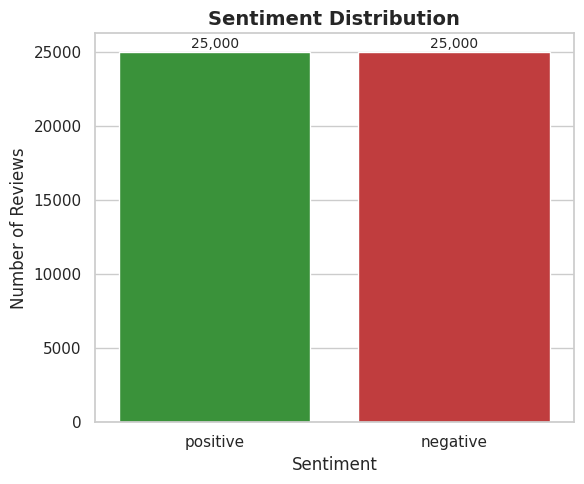

In [77]:
# 1) Sentiment distribution bar plot
if "sentiment" not in df.columns:
    raise KeyError("df must contain 'sentiment' column (values: 'positive'/'negative').")

plt.figure(figsize=(6,5))
ax = sns.countplot(x='sentiment', data=df, palette=["#2ca02c","#d62728"])
plt.title("Sentiment Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# annotate bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=10, xytext=(0,6), textcoords='offset points')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "sentiment_distribution.png"), dpi=150)
plt.show()


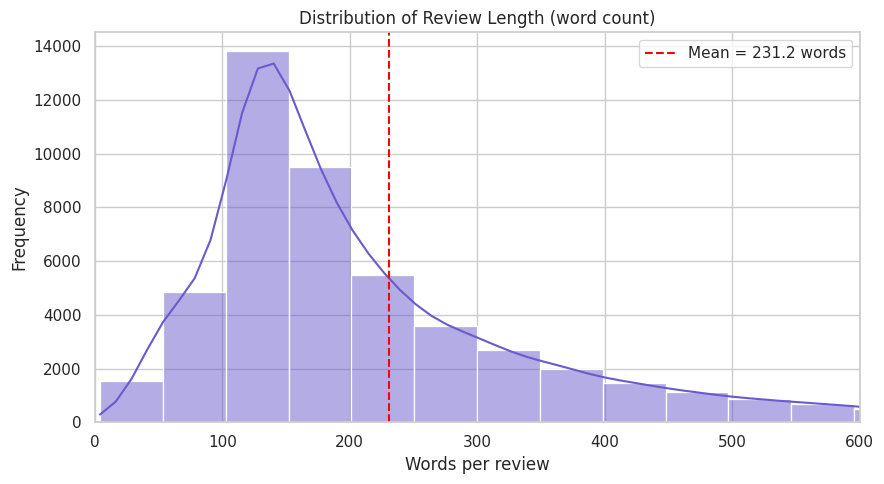

In [78]:
# 2) Review length histogram (compute review_length if not present)
if "review_length" not in df.columns:
    # prefer cleaned text if available, else raw review
    text_col = "cleaned" if "cleaned" in df.columns else "review"
    df["review_length"] = df[text_col].astype(str).apply(lambda s: len(s.split()))

plt.figure(figsize=(9,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="#6a5acd")
mean_len = df["review_length"].mean()
plt.axvline(mean_len, color="red", linestyle="--", label=f"Mean = {mean_len:.1f} words")
plt.xlim(0, min(600, df["review_length"].max()+10))
plt.title("Distribution of Review Length (word count)")
plt.xlabel("Words per review")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "review_length_histogram.png"), dpi=150)
plt.show()


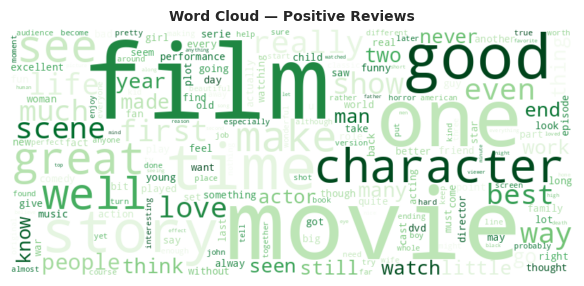

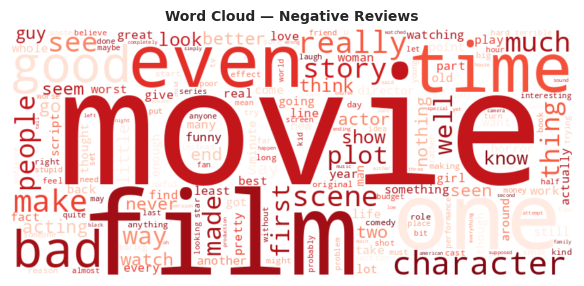

In [79]:
# 3) Word clouds: sample to speed up large datasets
def generate_wordcloud(text, title, colormap, fname):
    wc = WordCloud(width=800, height=350, background_color="white", colormap=colormap,
                   max_words=200, collocations=False).generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=10, fontweight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, fname), dpi=150)
    plt.show()

# build text for each sentiment (use sample for performance)
pos_texts = df[df['sentiment']=="positive"]["cleaned"] if "cleaned" in df.columns else df[df['sentiment']=="positive"]["review"]
neg_texts = df[df['sentiment']=="negative"]["cleaned"] if "cleaned" in df.columns else df[df['sentiment']=="negative"]["review"]

# sample (if dataset large) — take up to 8000 reviews
pos_text = " ".join(pos_texts.sample(n=min(len(pos_texts), 8000), random_state=1).astype(str))
neg_text = " ".join(neg_texts.sample(n=min(len(neg_texts), 8000), random_state=1).astype(str))

generate_wordcloud(pos_text, "Word Cloud — Positive Reviews", "Greens", "wordcloud_positive.png")
generate_wordcloud(neg_text, "Word Cloud — Negative Reviews", "Reds", "wordcloud_negative.png")


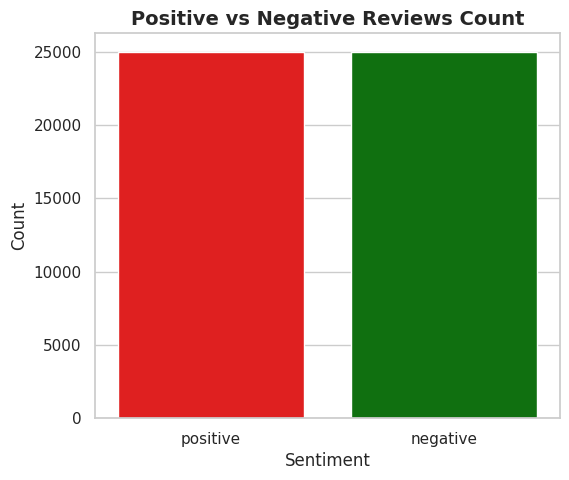

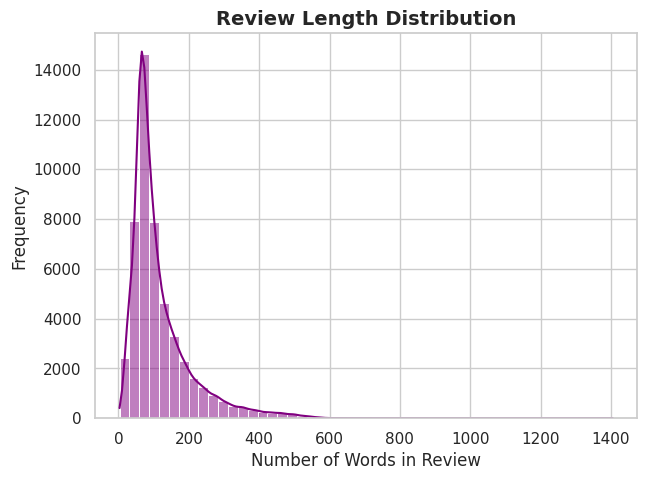

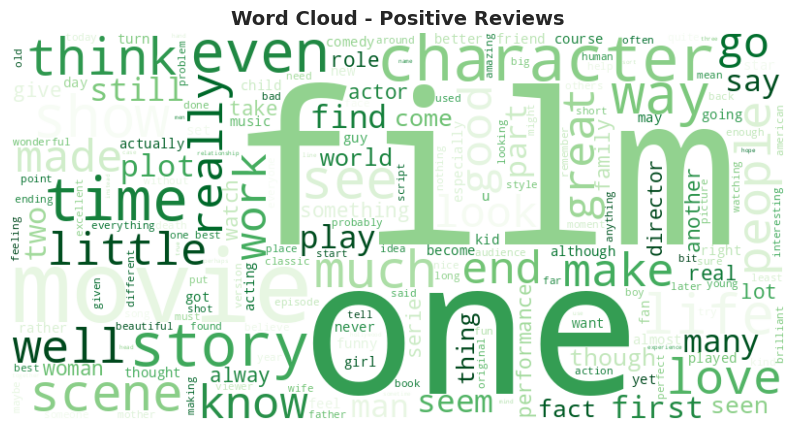

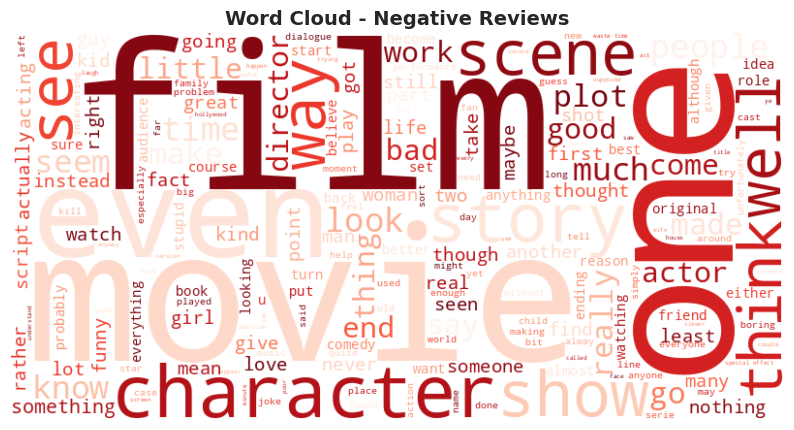

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. 📊 Bar Chart – Positive vs Negative reviews count
plt.figure(figsize=(6,5))
sns.countplot(x="sentiment", data=df, palette=["red","green"])
plt.title("Positive vs Negative Reviews Count", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 2. 📈 Histogram – Review length distribution
df["review_length"] = df["cleaned"].apply(lambda x: len(x.split()))

plt.figure(figsize=(7,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="purple")
plt.title("Review Length Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()

# 3. ☁️ Word Cloud – Positive reviews
positive_text = " ".join(df[df["sentiment"]=="positive"]["cleaned"])

wordcloud_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews", fontsize=14, fontweight="bold")
plt.show()

# 4. ☁️ Word Cloud – Negative reviews
negative_text = " ".join(df[df["sentiment"]=="negative"]["cleaned"])

wordcloud_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews", fontsize=14, fontweight="bold")
plt.show()


#Modeling and performance

<Figure size 800x600 with 0 Axes>

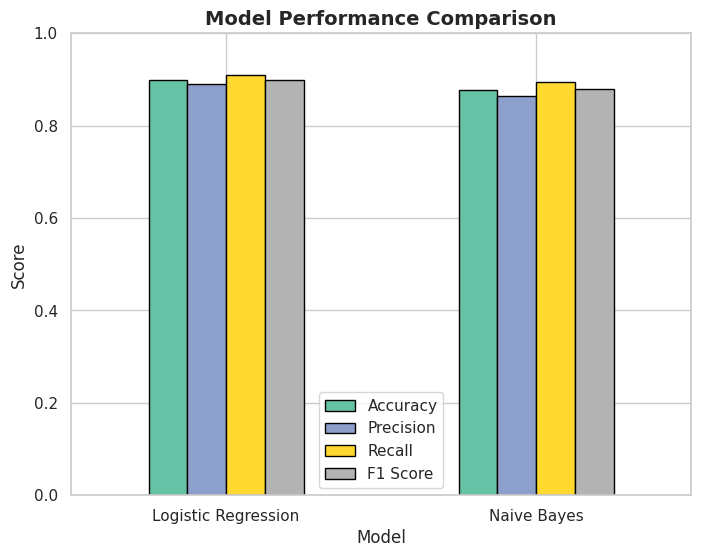

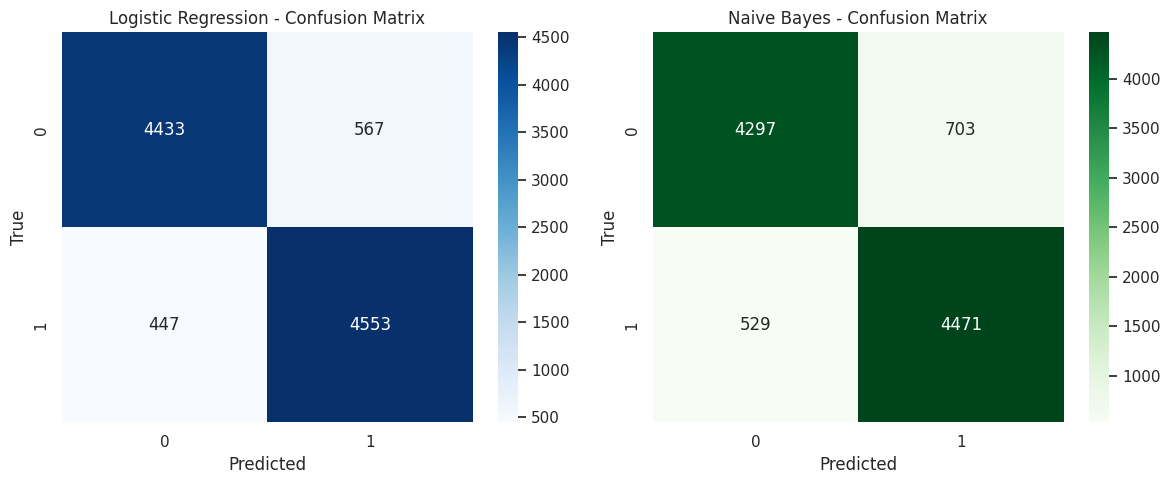


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      5000
           1       0.86      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# --- Train Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# --- Train Naive Bayes ---
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# --- Evaluation Function ---
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="binary", pos_label=1)
    rec = recall_score(y_true, y_pred, average="binary", pos_label=1)
    f1 = f1_score(y_true, y_pred, average="binary", pos_label=1)
    return {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}

# --- Collect Results ---
results = []
results.append(evaluate_model(y_test, y_pred_log, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_nb, "Naive Bayes"))

results_df = pd.DataFrame(results)

# --- 1. Bar Chart of Metrics ---
plt.figure(figsize=(8,6))
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1 Score"]].plot(
    kind="bar", figsize=(8,6), colormap="Set2", edgecolor="black"
)
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()

# --- 2. Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Logistic Regression CM
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_model.classes_, yticklabels=log_model.classes_,
            ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Naive Bayes CM
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens",
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_,
            ax=axes[1])
axes[1].set_title("Naive Bayes - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# --- 3. Print Classification Reports ---
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))


#: Insights & Interpretation

In [84]:
from keras.models import load_model
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = load_model("/content/model.h5")
tokenizer = joblib.load("/content/tokenizer.pkl")

def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequences = pad_sequences(sequences,maxlen=200)
  prediction = model.predict(padded_sequences)
  sentiment = "positive"if prediction[0][0]>0.5 else "negative"
  return sentiment

In [85]:
review_sentiment = predictive_system("Exciting plot, mediocre character development")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [86]:
review_sentiment

'negative'

In [87]:
review_sentiment = predictive_system("visual stunning but poorly written")
review_sentiment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


'negative'

In [88]:
review_sentiment = predictive_system("This is a amazing movie")
review_sentiment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


'positive'

In [89]:
!pip install gradio

In [90]:
import gradio as gr
title = "MOVIE SENTIMENT ANALYSIS APPLICATION"
app = gr.Interface(fn = predictive_system, inputs="textbox", outputs="textbox",title=title )
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0d17ff190dc5da579e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
